# Lecture 8 - Linear Models for Regression
> Oh darlin’ you change from one day to the next,
I’m feelin’ deranged and just plain ol’ perplexed.
I’ve learned to put up with your raves and your rants,
The mean I can handle but not variance.

>--- One of the many interesting quotes from Kruschke's book ``Doing Bayesian Data Analysis".

## Objectives

+ Familiarize with generalized linear models (GLM)
+ Train GLM using least squares
+ Train GLM trhough maximum likelihood 
+ Train GLM using Bayesian linear regression (BLR)
+ Get acquainted with Bayesian model comparison
+ Use the evidence approximation to learn the hyper-parameters of BLR

## Readings

Before coming to class, please read the following:

+ [Ch. 3 of Bishop, 2006](http://www.amazon.com/Pattern-Recognition-Learning-Information-Statistics/dp/0387310738)

+ [Ohio State University, Bayesian Linear Regression](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=3&ved=0ahUKEwikxsiPuJPKAhVE32MKHRoMCtsQFggyMAI&url=http%3A%2F%2Fweb.cse.ohio-state.edu%2F~kulis%2Fteaching%2F788_sp12%2Fscribe_notes%2Flecture5.pdf&usg=AFQjCNFvxuyBfFkRN8bdJAvd_dlZdsShEw&sig2=UqakvfANehNUUK1J9rXIiQ)

You can also check out this 10 minutes short Youtube video on Bayesian Linear Regression - 
+ [Mathematicalmonk, Bayesian Linear Regression](https://www.youtube.com/watch?v=dtkGq9tdYcI)

## The Regression Problem

Imagine that you have a set of $n$, $d$-dimensional, inputs:
$$
\mathbf{x}_{1:n} = \{\mathbf{x}_1,\dots,\mathbf{x}_n\},
$$
and the corresponding outputs:
$$
\mathbf{t}_{1:n} = \{t_1,\dots,t_n\}.
$$
The regression problem consits of using the data $\mathbf{x}_{1:n}$ and $\mathbf{t}_{1:n}$ to find
the map that connects the inputs to the outputs.

Regression models are primarily used to predict the values of one or more continous *target* variables **t** given that we have the values for D-diemensional feature vector x (*input* variables).

Regression models which are also linear functions of the input variables are the simplest form of linear regression.

However, for Linear Regression, we can also have some really good expressive class of functions known as *basis functions* which are linear combinations of a fixed set of nonlinear functions of the input variables.

**Important note**

*Please note that regression models using *basis functions* are linear functions of the parameters and yet can be nonlinear with respect to the input variables.*




## Generalized Linear Models

The simplest form of linear regression model is defined as a linear combination of the input variables
$$
y(\mathbf{x}; \mathbf{w}) = w_{0} + w_{1}x_{1} + ... + w_{D}x_{D}.
$$

Extending the class of models (taking into consideration, linear combinations of fixed nonlinear functions) we have the following form -

$$y(x,w) = w_{0} + \sum_{j=0}^{M-1} w_{j}\phi_{j}(\mathbf{x}) = \mathbf{w^{T}\phi(x)}$$

where $\mathbf{w} = (w_{0}, ... , w_{M-1})^{T}$ and $\phi = (\phi_{0}, ..., \phi_{M-1})^{T})$.

**Features** can be defined in terms of basis functions $\mathbf{{\phi_{j}(x)}}$ for original input vector $\mathbf{x}$. With the help of non linear function of the input vector $\mathbf{x}$ we can allow the function $y(\mathbf{(x,w)}$ to be a non linear function in terms of $\mathbf{x}$.

Again, I would like to remind you that the above equation (models/functions) are called **linear models** because these functions are linear in terms of parameters $\mathbf{w}$. It is this linearity in terms of parameters that will greatly simplify the analysis of this class of models.

We will be looking into different types of **basis functions** shortly. Few of the examples are -
1. Identity Basis Function ($\mathbf{\phi(x) = x}$)
2. Polynomial Basis Function ($\mathbf{\phi(x) = x^{j}}$)
3. Gaussian Basis Function
4. Fourier Basis Function
5. Logistic Sigmoid Function

Given below are few examples of basis functions (namely, Linear (Identity) Basis, Polynomial Basis) -

In [17]:
import numpy as np

class LinearBasis(object):
    
    """
    A set of linear basis functions.
    
    :param d:  The dimensionality of the input space.
    """
    
    def __init__(self, d):
        self.d = d
        
    def __call__(self, x):
        return np.hstack([[1], x])
    

phi_l = LinearBasis(1)
phi_l([0.5])

array([ 1. ,  0.5])

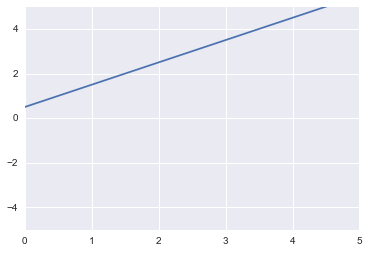

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interactive


def plot_linear_basis(w0=0.5, w1=1):
    x = np.linspace(0, 5, 100)
    w = [w0, w1]
    Phi = np.array([phi_l([x[i]]) for i in xrange(x.shape[0])])
    y = np.dot(Phi, w)
    fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_xlim((0, 5))
    ax.set_ylim((-5, 5))
    
interactive(plot_linear_basis, w0=(-5, 5, 0.1), w1=(-5, 5, 0.1))

In [19]:
class PolynomialBasis(object):
    
    """
    A set of linear basis functions.
    
    :param degree:  The degree of the polynomial.
    """
    
    def __init__(self, degree):
        self.degree = degree
        
    def __call__(self, x):
        return np.array([x ** i for i in range(self.degree)])
    
phi_p = PolynomialBasis(3)
phi_p(0.5)

array([ 1.  ,  0.5 ,  0.25])

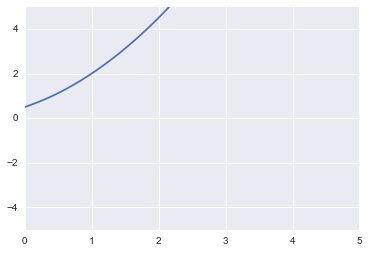

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interactive


def plot_poly_basis(w0=0.5, w1=1, w2=0.5):
    x = np.linspace(0, 5, 100)
    w = [w0, w1, w2]
    Phi = np.array([phi_p(x[i]) for i in xrange(x.shape[0])])
    y = np.dot(Phi, w)
    fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_xlim((0, 5))
    ax.set_ylim((-5, 5))
    
interactive(plot_poly_basis, w0=(-5, 5, 0.1), w1=(-5, 5, 0.1), w2=(-5, 5, 0.1))

### Maximum Likelihood and Least Squares

Let's look at the relationship between maximum likelihood and least squares approach.

Gaussian noise model is defined as below -

The target variable $t$ is defined as in terms of deterministic function $y(x,w)$ with additive Gaussian noise so that,
$$t = y(x,w) + \epsilon$$
where $\epsilon$ is the zero mean Gaussian random variable with precision (inverse variance) $\beta$. So, we can write it as
$$p(t | \mathbf{x},\mathbf{w},\beta) = N(t | y(\mathbf{x},\mathbf{w}), \beta^{-1})$$

For squared loss function, we also know that the optimal prediction, for a new value of x, will be given by the conditional mean of the target variable. In case of a Gaussian conditional distribution of the above form, conditional mean is given as,
$$E[t|x] = y(\mathbf{x}, \mathbf{w})$$

For a data set of inputs $\mathbf{X} = {\mathbf{x_{1}}, ... , \mathbf{x_{N}}}$,making the assumption that these data points are drawn independently from the distribution, we obtain an expression for likelihood function as,
$$p(\mathbf{t}|\mathbf{X},\mathbf{w}, \beta) =  \prod_{n=1}^N N(t_{n}|w^{T}\phi(x_{n}),\beta^{-1})$$

The idea in maximum likelihood estimation (MLE) is to maximize the total probability of observing the training set:
$$
\mathbf{w}_{MLE} = \max_{\mathbf{w}} \log p(\mathbf{t_{1:n}}|\mathbf{x}_{1:n}, \mathbf{w})
$$

Maximizing the above likelihood function with respect to parameters $\mathbf{w}$(for detailed steps refer to Pg. 141-142 of [Bishop's Pattern Recognition and Machine Learning, Linear Models for Regression](http://www.amazon.com/Pattern-Recognition-Learning-Information-Statistics/dp/0387310738)), we get,
$$\mathbf{w}_{MLE} = (\mathbf{\Phi^{T}\Phi)^{-1}\Phi^{T}t}$$


Maximizing the above likelihood function with respect to noise precision parameter $\beta$ we get,

$$\frac{1}{\beta_{ML}} = \frac{1}{N}\sum_{n = 1}^{N}({t_{n} - \mathbf{w_{ML}}^{T}\phi(x_{n})}^2 ) $$

#### Advantages of Maximum Likelihood Methods (in general) -

+ Maximum Likelihood method is a pretty generalized and consistent method for estimating the parameters of any model at study (be it logistic Regression, linear regression or any other standard models).This means that maximum likelihood estimates can be developed for a large variety of estimation situations.


+ Maximum likelihood methods have desirable mathematical and optimality properties.
(Specifically as the sample size increases, they become minimum variance unbiased estimators. That is, if we take a very large number of random samples with replacement from a population, the average value of parameter estimates will be theoretically exactly equal to the population value. They have approximate normal distribution and thus sample variances that can be used to generate required confidence bounds and hypothesis tests for the parameters).


+ Several popular statistical software packages like Scikit-Learn (Python) provide excellent algorithms for maximum likelihood estimates for many of the commonly used distributions. This helps mitigate the computational complexity of maximum likelihood estimation.

#### Disadvantages of Maximum Likelihood Methods -
+ The likelihood equations need to be specifically worked out for a particular distribution and estimation problem at study. The mathematics of which is often diffocult, particularly if confidence intervals for the parameters are desired.
+ Maximum likelihood estimates can be heavily biased for small samples. The optimality properties may not apply for small samples.
+ Maximum likelihood can be sensitive to the choice of starting values.
+ Overfitting and Underfitting problems

The problem of overfitting (and underfitting) are explained through the code given below - 
Taken from the site - http://ipython-books.github.io/featured-04/

26.26 -8.66 0.00
35.81 17.72 1.53 -11.71 -20.74 -24.23 -20.97 -10.53 5.49 21.24 23.87 -3.56 -44.73 69.06 -20.53 0.00


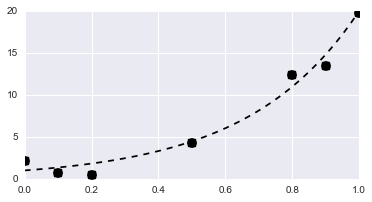

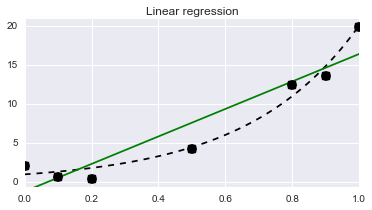

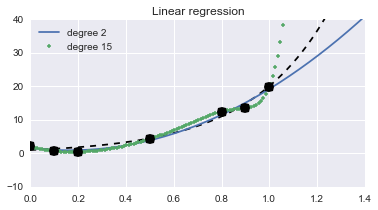

In [21]:
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
%matplotlib inline

f = lambda x: np.exp(3 * x)
x_tr = np.linspace(0., 2, 200)
y_tr = f(x_tr)
x = np.array([0, .1, .2, .5, .8, .9, 1])
y = f(x) + np.random.randn(len(x))
plt.figure(figsize=(6,3));
plt.plot(x_tr[:100], y_tr[:100], '--k');
plt.plot(x, y, 'ok', ms=10);

# We create the model.
lr = lm.LinearRegression()
# We train the model on our training dataset.
lr.fit(x[:, np.newaxis], y);
# Now, we predict points with our trained model.
y_lr = lr.predict(x_tr[:, np.newaxis])
plt.figure(figsize=(6,3));

plt.plot(x_tr, y_tr, '--k');
plt.plot(x_tr, y_lr, 'g');
plt.plot(x, y, 'ok', ms=10);
plt.xlim(0, 1);
plt.ylim(y.min()-1, y.max()+1);
plt.title("Linear regression");

lrp = lm.LinearRegression()
plt.figure(figsize=(6,3));
plt.plot(x_tr, y_tr, '--k');

for deg, s in zip([2, 15], ['-', '.']):
    lrp.fit(np.vander(x, deg + 1), y);
    y_lrp = lrp.predict(np.vander(x_tr, deg + 1))
    plt.plot(x_tr, y_lrp, s, label='degree ' + str(deg));
    plt.legend(loc=2);
    plt.xlim(0, 1.4);
    plt.ylim(-10, 40);
    # Print the model's coefficients.
    print(' '.join(['%.2f' % c for c in lrp.coef_]))
plt.plot(x, y, 'ok', ms=10);
plt.title("Linear regression");

### Bayesian Linear Regression

Let's turn our attention to Bayesian version of Linear Regression, which will help us in avoiding the overfitting problem of maximum likelihood, and which will also lead to automatic methods of determining model complexity using only training data (validation data is not required when we are thinking **Bayesian!** ).

In the subsequent section we would try to explain Bayesian Linear Regression with an example.

Let us define some random two diemensional noisy data (for example, assume that the given data defines *height* of the person as independent variable $\mathbf{X} = (x_{1}....x_{N})$ and *weight* of the person as dependent variable $\mathbf{t} = (t_{1}... t_{N})$ where $N$ is the number of data points available for analysis.

Defining the random data (for the purpose of our analysis)

The observed value $t$ differ from the function values $f(x)$ by additive noise and we further assume that this noise follows an IID Gaussian distribution with zero mean and variance $\sigma^{2}_{n} = 1$.
We then  have $$\epsilon \sim N(0,\sigma_{n}^{2} = 1) \sim N(0,1)$$




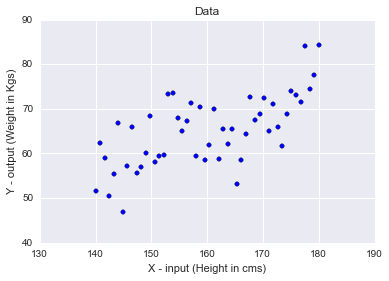

In [22]:
%matplotlib inline
import numpy as np
import scipy.linalg
from math import *
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
#------------------------------------------------------------------------------
# Artificially Generated Random Data

x_low = 140
x_high = 180
size = 50
a, s = 1,1
b = 0.4
np.random.seed(123)
X1 = np.linspace(x_low,x_high,size).T
x = X1.reshape(size,1)
t = a + b*X1 + 5*np.random.randn(size)*s

# Plotting the generated data
fig, ax = plt.subplots(1,1,sharex=True)
ax.scatter(X1, t)
ax.set_xlabel('X - input (Height in cms)')
ax.set_ylabel('Y - output (Weight in Kgs)')
ax.set_title('Data')

#### Parameter Distribution
As a Bayesian, our first step would be to define prior probability distributions over the model parameters $\mathbf{w}$. 

Also, for the sake of simplicity, let's treat the noise parameter $\beta$ to be known constant. A conjugate prior for the likelihood function (as defined above) is given by a Gaussian distribution of the form
$$p(\mathbf{w}) = N(\mathbf{w|m_{0},S_{0}})$$ 
where $m_{0}$ is the mean and $S_{0}$ is the covariance.


The prior are defined as below -

(For the sake of analysis, let's assume (believe ! Its all about belief while doing Bayesian analysis) that our paramters have a mean of $0$ and covariance of $1$ for each paramter)

$$\mathbf{w} \sim N(\mathbf{0}, \Sigma_{p} = \alpha^{-1}\mathbf{I})$$

The Posterior distribution over parameter value = w 0


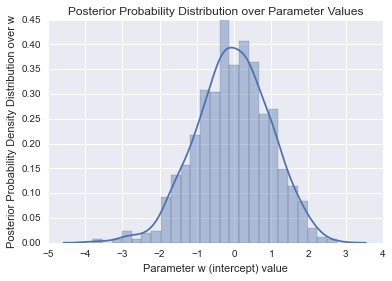

The Posterior distribution over parameter value = w 1


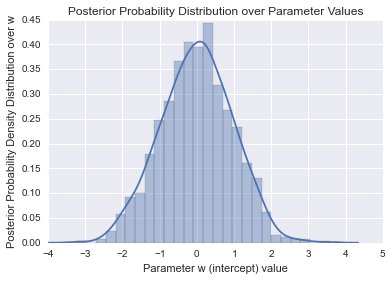

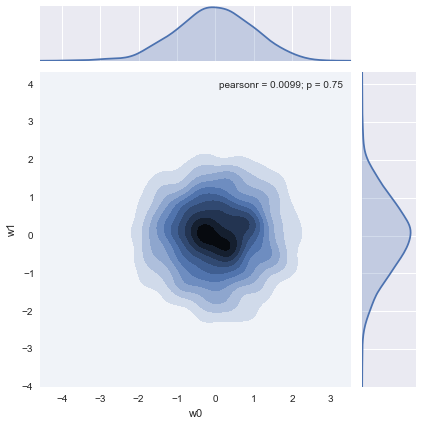

In [23]:
def uniformative_prior(Xn):
    """
    Defining the prior distribution over Parameters
    W = [w1 w2... wn]
    number of features = number of parameter values which we need.
    Prior over w is defined as p(w) = N(mean, covariance_matrix).
    
    :param Xn : Number of features to be used
    """
    
    muN = np.zeros(Xn+1).T # prior_parameter mean
    SNi = np.eye(Xn+1) # prior_parameter covariance matrix
    LNi = scipy.linalg.cholesky(SNi, lower=True)
    return muN, LNi


def blr_sample_gaussian(muN, LNi, n):
    """
    The given functions take samples from the Gaussian distribution of the weigths.
    (Function similiar to sampling from a Gaussian distribution except that
    instead of the Covariance matrix, we use a lower triangular matrix we
    obtain from Cholesky factorization of Covariance matrix)
    
    Inputs :
    
    :param muN :    Mean Vector of the multi Gaussian distribution from which we want the random samples
    :param LNi :    Lower triangular matrix obtained from the Cholesky decomposition of Covariance matrix of the Gaussian distribution
    :n :            Number of random samples we want from the given Gaussian distribution

    Outputs :
    
    :Y : Random samples from the multi-variate Gaussian distribution
           
    """
    dim = muN.shape[0]
    Y = np.ndarray((n, dim))
    for i in xrange(n):
        z = np.random.randn(dim)
        tmp = scipy.linalg.solve_triangular(LNi, z, 'T', True)
        Y[i, :] = muN + tmp
    return Y


muN,LNi = uniformative_prior(1) # Height is the feature (dependent variable) . So, number of features = 1
Y = blr_sample_gaussian(muN, LNi, 1000)

for i in xrange(Y.shape[1]):
        sns.distplot(Y[:,i])
        print 'The Posterior distribution over parameter value = w %d'%i
        plt.xlabel('Parameter w (intercept) value')
        plt.ylabel('Posterior Probability Density Distribution over w')
        plt.title('Posterior Probability Distribution over Parameter Values')
        plt.show()

df = pd.DataFrame(Y, columns=["w0", "w1"])
sns.jointplot(x="w0", y="w1", data=df,kind="kde")

What we are really interested in is the posterior distribution over the parameters, which is proportional to the product of likelihood function and prior distribution (*Bayes rule*). Due to the choice of a conjugate Gaussian prior distribution, the posterior will be Gaussian as well (Makes our life easy! Statisticians love Gaussian!).

We obtain posterior distribution to be in the form,

$$p(\mathbf{w|t}) = N(\mathbf{w|m_{N}, S_{N}})$$

where $\mathbf{m_{N}} = \mathbf{S_{N}}(\mathbf{S_{0}^{-1}m_{0}} + \beta \mathbf{\Phi^{T}t})$ and $\mathbf{S_{N}^{-1}} = \mathbf{S_{0}}^{-1} + \beta \mathbf{\Phi^{T}\Phi}$.

As we know, the posterior distribution is Gaussian. So, the mode of posterior Gaussian distribution coincides with its mean. Hence the maximum posterior weight vector is simply given as $\mathbf{w}_{MAP} = \mathbf{m}_{N}$.

Now, let's see how defining different priors affect the posterior distribution over parameters.

1. If we consider an infinitely broad prior $\mathbf{S_{0}} = \alpha^{-1}\mathbf{I}$ with $\alpha \rightarrow 0$, then the mean of posterior $\mathbf{m}_{N}$ is reduced to maximum likelihood value $\mathbf{w}_{ML}$.

2. If we dont have any data for visualization ie. if $N = 0$, our posterior belief will be the belief we had prior to seeing any data. We dont have any new information, hence our posterior beliefs will coincide with the prior beliefs we had about the data. Furthermore, also note that Bayesian analysis acts as a sequential learning process ie. if data points arrive sequentially, then the posterior distribution at any stage in our analysis acts as the prior distribution for subsequent data point, in such a way, that new posterior distribution is again given by the posterior distribution equation defined above.

3. For Gaussian prior which we have defined above $\mathbf{w} \sim N(\mathbf{0}, \Sigma_{p} = \alpha^{-1}\mathbf{I})$, the corresponding mean and variance of posterior distribution is given as -

$$\mathbf{m_{N}} = \beta \mathbf{S_{N}} \mathbf{\Phi_{T} t}$$
$$\mathbf{S_{N}^{-1}} = \alpha \mathbf{I} + \beta \mathbf{\Phi^{T}\Phi}$$.

Let's have a look at our Weight VS. Height example.

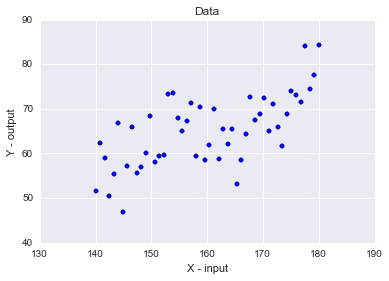

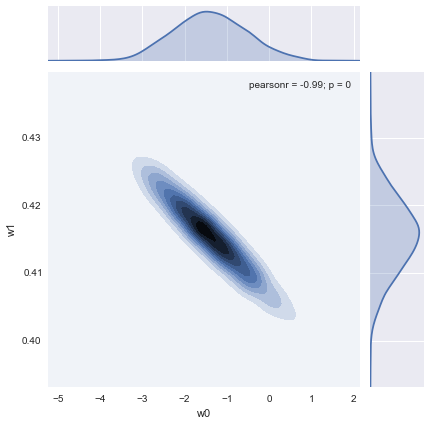

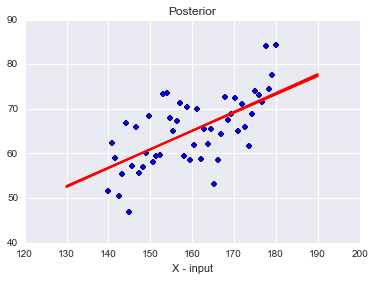

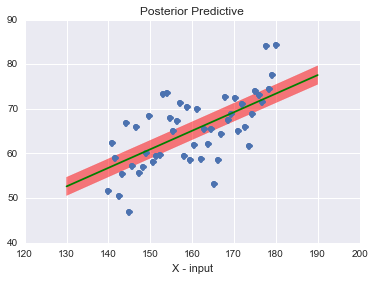

In [24]:
def poly_basis_func(x, n):
    """
    Takes input vector x and
    outputs polynomial basis function matrix Phi with degree n
    
    Inputs:
    
    :param x : input vector x
    :param n : degree for the polynomial basis
    
    Outputs:
    
    :param Phi : Polynomal basis function
    
    """
    
    poly = PolynomialFeatures(degree=n)
    Phi = poly.fit_transform(x)  
    return Phi



            
def sample_multi_gaussian(mu, C, n):
    """
    Samples from a multivariate Gaussian.
    
    Inputs:
    
    :param mu:  The mean vector
    :param C:   The covariance matrix.
    :param n:   Number of samples we want to draw from a multivariate
                Gaussian distribution with mean = mu and covariance matrix = C
    
    Outputs:
    
    :return:    ``n`` number of random samples
                from the multi variate Gaussian distribution.
    """
    dim = mu.shape[0]
    L = np.linalg.cholesky(C)
    Y = np.ndarray((n, dim))
    for i in xrange(n):
        z = np.random.randn(dim)
        Y[i, :] = mu + np.dot(L, z) 
    return Y
 


def blr_train(Phi, t, alpha, beta):
    """
    Computes the predictive mean and the lower Cholesky of covariance for
    Bayesian linear regression using Eq. (3.53-3.54) of Bishop (2006).
    
    Inputs:
    
    :param Phi:     The design matrix.
    :param t:       The targets.
    :param alpha:   The prior precision (inverse covariance) of the regression weights.
    :param beta:    The noise precision.
    
    Output:
    
    :returns:       A tuple whose first element is the predictive mean ``muN``,
                    and its second element in the lower Cholesky of the 
                    inver covariance matrix ``LNi``.
    """
    N = Phi.shape[1]
    SNi = alpha * np.eye(N) + beta * np.dot(Phi.T, Phi)
    LNi = scipy.linalg.cholesky(SNi, lower=True)
    muN = scipy.linalg.cho_solve((LNi, True), beta * np.dot(Phi.T, t))
    
    # cho_solve does this:
    # tmp = scipy.linalg.solve_triangular(LNi, beta * np.dot(Phi.T, t), 'N', True)
    # muN = scipy.linalg.solve_triangular(LNi, tmp, 'T', True)
    return muN, LNi

def blr_sample_posterior(muN, LNi, n):
    """
    The given functions take samples from the Gaussian posterior distribution of the weigths.
    (Function similiar to sampling from a Gaussian distribution except that
    instead of the Covariance matrix, we use a lower triangular matrix we
    obtain from Cholesky factorization of Covariance matrix)
    
    Inputs :
    
    :param muN :    Mean Vector of the multi Gaussian posterior distribution from which we want the random samples
    :param LNi :    Lower triangular matrix obtained from the Cholesky decomposition of Covariance matrix of the Posterior distribution
    :n :            Number of random samples we want from the given posterior distribution

    Outputs :
    
    :Y : Random samples from the multi-variate posterior distribution
           
    """
    dim = muN.shape[0]
    Y = np.ndarray((n, dim))
    for i in xrange(n):
        z = np.random.randn(dim)
        tmp = scipy.linalg.solve_triangular(LNi, z, 'T', True)
        Y[i, :] = muN + tmp
    return Y
    
    
def blr_predict(phi, muN, LNi, beta):
    """
    The given function gives us the Predictive mean and covariance which we would be using to make the required predictions.
    
    Inputs:
    
    :param phi  : "Np x M" basis function values
    :param muN  : Mean vector for the posterior distribution over parameter W values
    :param LNi  : Lower triangular matrix obtained from Cholesky factorization of posterior covariance matrix
    :param beta : Gaussian random noise epsilon with zero mean and precision (inverse variance) beta
    
    Outputs:
    
    :param mu       : Mean of posterior predictive distribution
    :param sigma2   : Covariance matrix of Posterior Predictive distributions
    
    """
    n = phi.shape[0]
    mu = np.dot(phi, muN)
    sigma2 = np.ndarray((n,))
    for i in xrange(n):
        tmp = scipy.linalg.solve_triangular(LNi, phi[i, :], 'N', True)
        sigma2[i] = 1. / beta + np.dot(tmp, tmp)
    return mu, sigma2

#******************************************************************************
# Artificially Generated Random Data

size = 50 ## change this !!!

x_low = 140
x_high = 180
a, s = 1,1
b = 0.4
np.random.seed(123)
X1 = np.linspace(x_low,x_high,size).T
x = X1.reshape(size,1)
t = a + b*X1 + 5*np.random.randn(size)*s

degree = 1
fig, ax = plt.subplots(1,1,sharex=True)

#------------------------------------------------------------------------------
# Plotting the generated data

ax.scatter(X1, t)
ax.set_xlabel('X - input')
ax.set_ylabel('Y - output')
ax.set_title('Data')
#plt.show()

#------------------------------------------------------------------------------
if size == 0 :
    muN, LNi = uniformative_prior(degree)
else:
    # Basis to choose
    Phi = poly_basis_func(x,degree)
    # Train the given model
    muN, LNi = blr_train(Phi, t, 1, 1) 

Y = blr_sample_gaussian(muN, LNi, 1000)
df = pd.DataFrame(Y, columns=["w0", "w1"])
sns.jointplot(x="w0", y="w1", data=df,kind="kde")
    
#******************************************************************************
#******************************************************************************


# Fitting the model

size = 300
x_new_low = 130
x_new_high = 190
X1_new = np.linspace(x_new_low,x_new_high,size).T
x_new = X1_new.reshape(size,1)
Phi_new = poly_basis_func(x_new,degree) 

#------------------------------------------------------------------------------
# Posterior and Posterior Predictive Samples
Y = blr_sample_gaussian(muN, LNi, 1000)
mu, sigma2 = blr_predict(Phi_new, muN, LNi, 1)
function_upper = mu + 1.96*sigma2 # upper bound
function_lower = mu - 1.96*sigma2 # lower bound


#------------------------------------------------------------------------------
# Plot the posterior function space
fig, ax = plt.subplots(1,1,sharex=True)
for i in xrange(5):
    #plt.subplot(3, 1, 2)
    ax.plot(X1_new, np.dot(Y[i],Phi_new.T), 'r')
    ax.scatter(X1,t)
    ax.set_xlabel('X - input')
    #ax[1].ylabel('Y - output')
    ax.set_title('Posterior')
    #plt.subplot(3,1,2)


#------------------------------------------------------------------------------

#Plotting the posterior predictive for the new data
fig, ax = plt.subplots(1,1,sharex=True) 
ax.scatter(X1, t)  
ax.plot(X1, t, 'o')
ax.plot(X1_new, mu, 'g')
ax.fill_between(X1_new, function_upper,function_lower,color='r',alpha=.5)
ax.set_xlabel('X - input')
ax.set_title('Posterior Predictive')
fig.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()








Try changing the size (number) of avaiable data points and look at how it affects the posterior distribution over the parameter $w_{0}$ and $w_{1}$ value. 

We would be obtaining the posterior distribution over parameter values $\mathbf{w}$, for different length of datasets ($n$). Try obtaining results for the following values of size (number of datapoints) variable in the above code - 

1. n = 0 datapoint (what does it represent ? )
2. n = 1 datapoints
3. n = 2 datapoints 
4. n = 20 datapoints
5. n = 100 datapoints
6. n = 500 datapoints

In each case, note that samples drawn from the posterior distribution give  rise to the functions in the red in the third figure, and we see that these functions pass close to all the available data points. In the limit of an infinite number of data points, the posterior distribution would become a delta function centered on the true paramter values.

### Posterior Predictive Distribution

While making predictions in real life, we are rarely interested in knowing the values of parameters $\mathbf{w}$ itself but rather in making predictions $t$ for new values of $\mathbf{x}$. Hence for this purpose, we need to define posterior predictive which is given as -
$$p(t|\mathbf{t},\alpha,\beta) = \int p(t|\mathbf{w},\beta)p(\mathbf{w}|\mathbf{t},\alpha,\beta) d\mathbf{w} $$
where, \mathbf{t} is the vector of target values from training set.
The conditional distribution $p(t|\mathbf{w},\beta)$ and posterior weight distribution $p(\mathbf{w}|\mathbf{t},\alpha,\beta)$ are defined in the previous sections. Simplifying the above equation for predictive distribution we get,
$$p(t|x,\mathbf{t},\alpha,\beta) = N(t|\mathbf{m}_{N}^{T} \mathbf{\phi (x) },\sigma_{N}^{2} (\mathbf{x}))$$

where the variance $\sigma^{2}_{N}(\mathbf{x}) = \frac{1}{\beta} + \mathbf{\phi(x)}^{T} \mathbf{S}_{N} \mathbf{\phi(x)}$

The first term in the above expression represents the noise on the data whereas the second term reflects the uncertainity associated with the parameters $w$.

Note that, as additional data points are observed, the posterior distribution becomes narrower. Because of this, it can be shown that $\sigma^{2}_{N+1}(\mathbf{x}) \leq \sigma^{2}_{N}(\mathbf{x})$. Hence when $N \to \infty$, the second term in the above variance equation goes to zero and the variance of the predictive distribution arises soley from the additive noise governed by parameter $\beta$.

Let's look at one more example with non-linear data setup.


**Defining different basis functions required for further analysis**

Again, in this example, we will be trying to assess how posterior and posterior predictive distribution of the model for the data at study is affected by the number of datapoints we have for our analysis. We will be considering cases in which $N$ is going to change and will take values as follows -
1. N = 0 datapoint (what does it represent ? )
2. N = 1 datapoints
3. N = 20 datapoints
4. N = 100 datapoints
5. N = 500 datapoints




In [25]:
def gaussian_basis_func(x, X_anchor, width=0.1):
    """
    Takes input vector x and outputs Gaussian basis function Phi with number of Gaussian basis functions n
    
    Inputs:
    
    :param x : input vector x
    :param X_anchor : anchor points acting as a mean vector for the basis functions
    :param width : variance for each radial basis (More the variance - smoother would be the basis function)
    
    Outputs:
    
    :param Phi : Gaussian basis matrix
    """
    n = x.shape[0]
    m = X_anchor.shape[0]
    # Allocate the matrix for the basis set
    Phi = np.zeros((n, m))
    # Precompute the scale of the exponent
    #scale = .5 * width ** 2
    for i in xrange(n):
        for j in xrange(m):
            Phi[i, j] = np.exp( -.5 * (x[i] - X_anchor[j])**2 / width ** 2)
    return Phi




def fourier_basis(x, m):
    """
    Takes input vector x and m, outputs out fourier basis function Phi with diemensionality m
    
    Inputs:
    
    :param x : input vector x
    :param m : diemensionality for Phi basis function
    
    Outputs:
    
    :param Phi : Fourier basis function
    """  
    n = x.shape[0]
    Phi = np.zeros((n,m+1))
    Phi[:,0] = np.ones(n)    
    for j in xrange(m):
        j += 1  
        if j % 2 == 0:
            for i in xrange(n):
                Phi[i,j] = np.sin(j/2*np.pi*x[i])
        if j % 2 == 1:
            for i in xrange(n):
                Phi[:,j] = np.cos((j+1)/2*np.pi*x[i]) 
    return Phi


Try to change the **size** variable in the code given below
You can also try to change the **basis functions** and observe how it affects the posterior and posterior predictive distribution. For each plot you generate (for different values of $N$), the green curve shows the mean of the corresponding Gaussian predictive distribution, and the red shaded region spans one standard deviation either side of the mean.

Note - 

+ Predictive uncertainity depends on $x$ and is the smallest in the neighbourhood of the data points. 
+ Uncertainity decreases as more data points are observed.



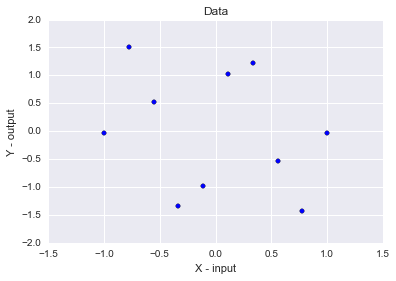

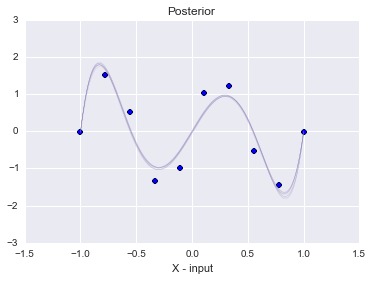

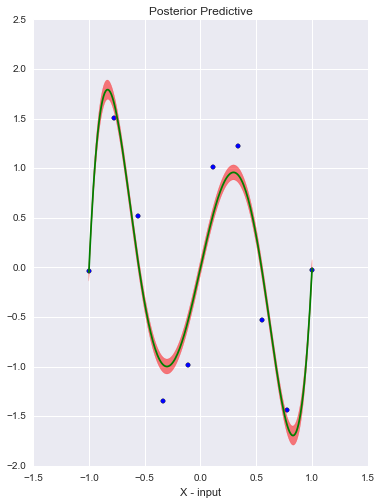

In [35]:
# Inputs to be given for Bayesian Linear Regression

beta = 1e3
alpha = 1
feat = 100
x_low = -1
x_high = 1

x_new_low = -1
x_new_high = 1

size = 10 # You can change this !!!!

#------------------------------------------------------------------------------
# Artificially Generated Random Data

a, s = 1.,1.
b = 1e3
np.random.seed(123)
X1 = np.linspace(x_low,x_high,size).T
x = np.linspace(x_low,x_high,size).T.reshape(size,1)
t = 1.5 * np.sin(2 * np.pi * X1) + 1 / np.sqrt(b) * np.random.randn(size) 
#fig, ax = plt.subplots(1,3,sharex=True)

#------------------------------------------------------------------------------
# Plotting the generated data

fig1 = plt.figure()  # a new figure window
ax1 = fig1.add_subplot(1, 1, 1)  # specify (nrows, ncols, axnum)

ax1.scatter(X1, t)
ax1.set_xlabel('X - input')
ax1.set_ylabel('Y - output')
ax1.set_title('Data')

# Width
width = 0.3

#******************************************************************************

if size == 0 :
    muN, LNi = uniformative_prior(feat)
else:
    Phi = poly_basis_func(x,9)
    # Train the given model
    muN, LNi = blr_train(Phi, t, alpha, beta) 

# New data on which to run the prediction model

size_new = 200
X1_new = np.linspace(x_new_low,x_new_high,size_new).T
x_new = np.linspace(x_new_low,x_new_high,size_new).T.reshape(size_new,1)
Phi_new = poly_basis_func(x_new, 9)

#------------------------------------------------------------------------------
# Posterior and Posterior Predictive Samples

Y = blr_sample_posterior(muN, LNi, 1000)
mu, sigma2 = blr_predict(Phi_new, muN, LNi, beta)
sigma = np.sqrt(sigma2)
function_upper = mu + 1.96*sigma # upper bound
function_lower = mu - 1.96*sigma # lower bound

#------------------------------------------------------------------------------
# Plot the posterior function space

fig2 = plt.figure()  
ax2 = fig2.add_subplot(1, 1, 1)  

for i in xrange(10):  
    ax2.plot(X1_new, np.dot(Y[i],Phi_new.T), color=sns.color_palette()[3], linewidth=0.1)
    ax2.scatter(X1,t)
    ax2.set_xlabel('X - input')
    ax2.set_title('Posterior')

    
#------------------------------------------------------------------------------

#Plotting the posterior predictive for the new data

fig3 = plt.figure(figsize=(6,8))
ax3 = fig3.add_subplot(1, 1, 1)   
ax3.scatter(X1, t)  
ax3.plot(X1_new, mu, 'g')
ax3.fill_between(X1_new, function_upper,function_lower,color='r',alpha=.5)
ax3.set_xlabel('X - input')
ax3.set_title('Posterior Predictive')


### Bayesian Model Comparison

We have already observed the overfitting problems we might face if we use the Maximum Likelihood (LSR) method. In order to avoid overfitting in those models, we use cross validation technique for setting the values of  **regularization parameters** or choosing between alternative models.

In **Bayesian linear regression**, the problem of overfitting is avoided by marginalizing (summing or integrating) over the model parameters instead of making point estimates of their values. This is useful in the sense that our model can be trained directly on the training data, without the need for validation set data. It is also useful in the sense, that we would not need multiple training runs for each available data used and it also allows for the simultaneous determination of multiple complexity parameters of the model.

Bayesian view of model comparison simply involves the use of probabilities to represent uncertainity in the choice of model, along with the use of sum and product rules of probability.


Suppose we wish to compare a set of $L$ models ${M_{i}}$ where $i = 1, ... L$. Here, model refers to a probability distribution over the observed data $D$. We shall suppose that the data is generated from one of these models but we are uncertain which one. Our uncertainity is then expressed through a prior probability distribution $p(M_{i})$. Given a training set $D$, posterior distribution is given as
$$p(M_{i}|D) \propto p(M_{i})p(D|M_{i})$$

Prior allows us to express a preference for different models. The *model evidence (marignal likelihood)* term $p(D|M_{i})$ expresses the preference shown by the data for different models at study. The ratio of model evidence $p(D|M_{i})/p(D|M_{j})$, for two models is known as *Bayes factor*.

Selecting the most probable model alone to make predictions is known as *model selection*.

Model evidence is given as -
$$p(D|M_{i}) = \int p(D|\mathbf{w},M_{i})p(\mathbf{w}|M_{i})$$

From sampling perspective, marginal likelihood can be viewed as the propbability of generating the data set $D$ from a model whose parameters are sampled at random from the prior.

Simplifying the above expression (and also taking some assumptions into account) we obtain the following expression,
$$ln(p(D)) = ln(p(D|\mathbf{w}_{MAP})) + M ln (\frac{\triangle w_{posterior}}{\triangle w_{prior}})$$
where $\triangle w_{posterior}$ represents the width in the posterior distribution which is sharply peaked around the most probable value $w_{MAP}$ and $M$ is the number of parameters which represents the given model. 

+ The first term in the above expression represents the fit to the data given by most probable parameter values.
+ The second term in the above expression penalizes the model according to its complexity. Because $\triangle w_{posterior} < \triangle w_{prior}$, this term is negative and it increases in magnitude as the ratio $\frac{\triangle w_{posterior}}{\triangle w_{prior}}$ gets smaller.
+ The size of the complexity penalty increases linearly with the number $M$ of adaptive parameters in the model.

As we increase the complexity of the model, the first term will typically decrease, because a more complex model is able to fit the data well, whereas the second term will increase due to dependence on $M$.

Hence the optimal model complexity, as determined by the maximum evidence, will be given by a trade-off between these two competing terms. In simple terms, model evidence will try to favor a model of intermediate complexity in the sense that simpler model cannot fit the data well, whereas the more complex model spreads its predictive probability over too broad a range of data sets and so assigns relatively small probability to any one of them.


### Evidence Approximation

